## Logistic Regression on Airfoil Self-Noise Dataset

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import train_test_split

In [27]:
feature_names = ['Frequency','Angle','Chord Length','velocity','displacement thickness','sound pressure']
airfoil = pd.read_csv("./airfoil_self_noise.csv",header=None,sep='\t',names=feature_names)

We will use the airfoil_self_noise.csv file as our dataset. It is a '\t' seperated file so we'll specify it as a parameter for the read_csv function.

In [28]:
airfoil.head()

,Frequency,Angle,Chord Length,velocity,displacement thickness,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [29]:
airfoil = pd.DataFrame(airfoil)
airfoil.head()

,Frequency,Angle,Chord Length,velocity,displacement thickness,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [30]:
corelation = airfoil.corr('pearson') 

Using the Pearson correlation to find out what features contribute most to predicting our target.

In [31]:
corelation['sound pressure'].sort_values()

Frequency                -0.390711
displacement thickness   -0.312670
Chord Length             -0.236162
Angle                    -0.156108
velocity                  0.125103
sound pressure            1.000000
Name: sound pressure, dtype: float64

In [38]:
x1= airfoil['Frequency']
x2 = airfoil['displacement thickness']
x3 = airfoil['Chord Length']
x4 = airfoil['Angle']
x5 = airfoil['velocity']
y = airfoil['sound pressure']


Scaling the data to values between 0 to 1

In [47]:
x1 = (x1 - x1.min())/(x1.max()-x1.min())
x2 = (x2 - x2.min())/(x2.max()-x2.min())
x3 = (x3 - x3.min())/(x3.max()-x3.min())
x4 = (x4 - x4.min())/(x4.max()-x4.min())
x5 = (x5 - x5.min())/(x5.max()-x5.min())
y = (y - y.min())/(y.max()-y.min())

visualization of 2 features in a 3d plot

Text(0.5,0,'displacement thickness')

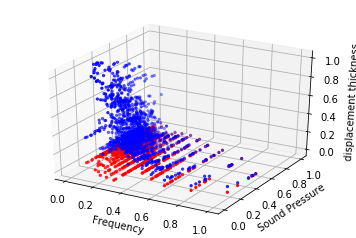

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,y,c='r',marker='.')
ax.scatter(x1,y,x2,c='b',marker='.')
ax.set_xlabel('Frequency')
ax.set_ylabel('Sound Pressure')
ax.set_zlabel('displacement thickness')

A plot of all features

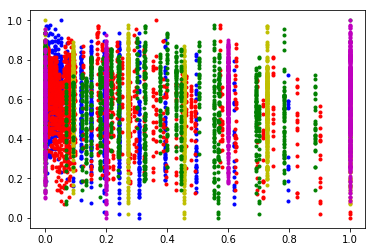

In [62]:
plt.plot(x1,y,'b.',x2,y,'r.',x3,y,'y.',x4,y,'g.',x5,y,'m.')

In [10]:
x1= np.array(x1)
x2= np.array(x2)
x3= np.array(x3)
x4= np.array(x4)
x5= np.array(x5)
y = np.array(y)

spliting the data into train and test data

In [11]:
x1_train,x1_test,x2_train,x2_test,x3_train,x3_test,x4_train,x4_test,x5_train,x5_test,y_train,y_test = train_test_split(x1,x2,x3,x4,x5,y,test_size=0.2)

In [12]:
x1_train.size

1202

In [13]:
len(x1_test)

301

In [14]:
def hypothesis(a,x1,b,x2,c,x3,d,x4,e,x5,f):
    return a*x1 +b*x2 + c*x3 + d*x4 + e*x5 +f

In [15]:
def error(a,x1,b,x2,c,x3,d,x4,e,x5,f,y):
    er = 0
    m = len(x1)
    
    for i in range(m):
        er += np.power((hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e,x5[i],f)-y[i]),2)
    return (1/(2*m))*er

In [16]:
def step_gradient(a,x1,b,x2,c,x3,d,x4,e,x5,f,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    grad_d = 0
    grad_e = 0
    grad_f = 0
    m = len(x1)
    
    for i in range(m):
        grad_a += (1/m)*(hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e,x5[i],f) - y[i])*x1[i]  #partial differentiation
        grad_b += (1/m)*(hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e,x5[i],f) - y[i])*x2[i]
        grad_c += (1/m)*(hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e,x5[i],f) - y[i])*x3[i]
        grad_d += (1/m)*(hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e,x5[i],f) - y[i])*x4[i]
        grad_e += (1/m)*(hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e,x5[i],f) - y[i])*x5[i]
        grad_f += (1/m)*(hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e,x5[i],f) - y[i])
        
    a = a - grad_a * learning_rate
    b = b - grad_b * learning_rate
    c = c - grad_c * learning_rate
    d = d - grad_d * learning_rate
    e = e - grad_e * learning_rate
    f = f - grad_f * learning_rate
    
    return a,b,c,d,e,f

In [17]:
def descend(init_a,x1,init_b,x2,init_c,x3,init_d,x4,init_e,x5,init_f,y,learning_rate,iterations):
    a = init_a
    b= init_b
    c = init_c
    d = init_d
    e = init_e
    f = init_f
    
    for i in range(iterations):
        er = error(a,x1,b,x2,c,x3,d,x4,e,x5,f,y)
        
        if i % 1000 ==0:
            print(f"Error: {np.sqrt(er)}, a:{a}, b:{b}, c:{c}, d:{d}, e:{e}, f:{f}")
            
        a,b,c,d,e,f = step_gradient(a,x1,b,x2,c,x3,d,x4,e,x5,f,y,learning_rate)
    
    return a,b,c,d,e,f

In [18]:
a= -0.6655724778016787
b= -0.2183683963204855
c= -0.26070232251418307
d= -0.24908967488101885
e= 0.10555084468194936
f= 0.8294676186998088
learning_rate = 0.001
iterations = 10000

In [19]:
final_a,final_b,final_c,final_d,final_e,final_f = descend(a,x1_train,b,x2_train,c,x3_train,d,x4_train,e,x5_train,f,y_train,learning_rate,iterations)

Error: 0.09067404728748409, a:-0.6655724778016787, b:-0.2183683963204855, c:-0.26070232251418307, d:-0.24908967488101885, e:0.10555084468194936, f:0.8294676186998088
Error: 0.09065470806101301, a:-0.6663480161583645, b:-0.2187212148014756, c:-0.2602521519824059, d:-0.24953415668189044, e:0.10417242622221086, f:0.8289694221924626
Error: 0.0906450467079633, a:-0.6670173973812351, b:-0.21892670297697628, c:-0.25962885348528925, d:-0.24972814743358082, e:0.1032749421944561, f:0.8291033961150219
Error: 0.0906375061785812, a:-0.6676535155175074, b:-0.2190917575170043, c:-0.25904061885154367, d:-0.24984619462236246, e:0.102556614994692, f:0.8293425444622539
Error: 0.090631364574545, a:-0.6682714586482512, b:-0.2192402581874545, c:-0.2585205423215744, d:-0.24992852000286356, e:0.1019452246584552, f:0.8295816156268346
Error: 0.09062628835468521, a:-0.6688744651449339, b:-0.21937866720107677, c:-0.25806707952892355, d:-0.24998701518653388, e:0.10141704400737575, f:0.8298017039031367
Error: 0.090

Final values of the weights and bias

In [64]:
final_a,final_b,final_c,final_d,final_e,final_f

(-0.6716843300475145,
 -0.21998422721218064,
 -0.2565451703623272,
 -0.2500667808273602,
 0.09966751238687284,
 0.8306339558042584)

A comparison of the actual values with predicted values

In [66]:
y_test[:3]

array([0.25056505, 0.84899088, 0.69920494])

In [65]:
hypothesis(final_a,x1_test[:3],final_b,x2_test[:3],final_c,x3_test[:3],final_d,x4_test[:3],final_e,x5_test[:3],final_f)          

array([0.2329048 , 0.69680246, 0.48700218])

Root Mean Squared Error:

In [24]:
error = np.sqrt(error(final_a,x1_test,final_b,x2_test,final_c,x3_test,final_d,x4_test,final_e,x5_test,final_f,y_test))
error

0.08897929799981755